In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [2]:
df = pd.read_csv('https://prod-hub-indexer.s3.amazonaws.com/files/5b5c745e0f1f48e7a53acec63a0022ab/0/full/4326/5b5c745e0f1f48e7a53acec63a0022ab_0_full_4326.csv')
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.320757,47.609408,1,328476,329976,EA08706,Matched,Block,NaN,BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
1,-122.319561,47.662221,2,328142,329642,EA06882,Matched,Block,NaN,8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST,...,Dry,Daylight,NaN,NaN,NaN,32,One parked--one moving,0,0,Y
2,-122.327525,47.604393,3,20700,20700,1181833,Unmatched,Block,NaN,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,...,NaN,NaN,NaN,4030032.0,NaN,NaN,NaN,0,0,N
3,-122.327525,47.708622,4,332126,333626,M16001640,Unmatched,Block,NaN,NE NORTHGATE WAY BETWEEN 1ST AVE NE AND NE NOR...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,-122.292120,47.559009,5,328238,329738,3857118,Unmatched,Block,NaN,M L KING JR ER WAY S BETWEEN S ANGELINE ST AND...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [3]:
df.shape

(221389, 40)

In [4]:
df = df[['SEVERITYCODE', 'ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]

In [6]:
df.dropna(subset=['SEVERITYCODE', 'ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'], inplace = True)

In [7]:
df.reset_index(inplace = True, drop = True)

In [8]:
df.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,1,Block,Raining,Wet,Dark - Street Lights On
1,1,Block,Clear,Dry,Daylight
2,1,Block,Clear,Dry,Daylight
3,1,Block,Clear,Wet,Daylight
4,1,Intersection,Overcast,Dry,Daylight


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192882 entries, 0 to 192881
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  192882 non-null  object
 1   ADDRTYPE      192882 non-null  object
 2   WEATHER       192882 non-null  object
 3   ROADCOND      192882 non-null  object
 4   LIGHTCOND     192882 non-null  object
dtypes: object(5)
memory usage: 7.4+ MB


In [10]:
df.shape

(192882, 5)

In [11]:
df['SEVERITYCODE'].unique()

array(['1', '2', '2b', '3', '0'], dtype=object)

In [12]:
df['SEVERITYCODE'].value_counts()

1     131930
2      57566
2b      3045
3        339
0          2
Name: SEVERITYCODE, dtype: int64

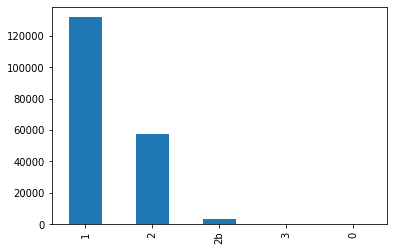

In [13]:
fig, ax = plt.subplots()
df['SEVERITYCODE'].value_counts().plot(ax=ax, kind='bar')

In [14]:
df['ADDRTYPE'].unique()

array(['Block', 'Intersection', 'Alley'], dtype=object)

In [15]:
df['ADDRTYPE'].value_counts()

Block           126246
Intersection     65881
Alley              755
Name: ADDRTYPE, dtype: int64

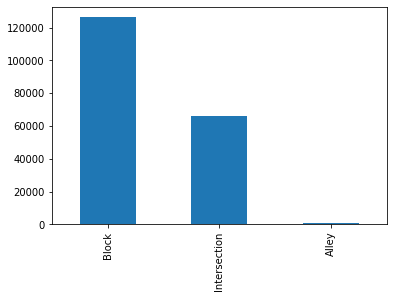

In [16]:
fig, ax = plt.subplots()
df['ADDRTYPE'].value_counts().plot(ax=ax, kind='bar')

In [17]:
df['WEATHER'].unique()

array(['Raining', 'Clear', 'Overcast', 'Snowing', 'Unknown', 'Other',
       'Fog/Smog/Smoke', 'Partly Cloudy', 'Sleet/Hail/Freezing Rain',
       'Blowing Sand/Dirt', 'Severe Crosswind'], dtype=object)

In [18]:
df['WEATHER'].value_counts()

Clear                       114044
Raining                      33865
Overcast                     28377
Unknown                      14099
Snowing                        908
Other                          818
Fog/Smog/Smoke                 571
Sleet/Hail/Freezing Rain       115
Blowing Sand/Dirt               49
Severe Crosswind                26
Partly Cloudy                   10
Name: WEATHER, dtype: int64

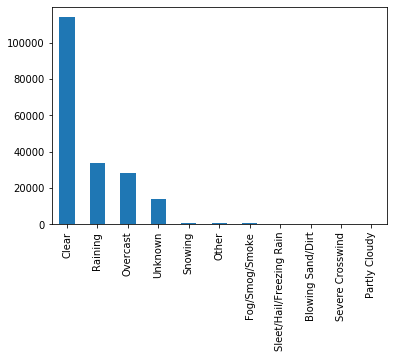

In [19]:
fig, ax = plt.subplots()
df['WEATHER'].value_counts().plot(ax=ax, kind='bar')

In [20]:
df['ROADCOND'].unique()

array(['Wet', 'Dry', 'Unknown', 'Standing Water', 'Snow/Slush', 'Ice',
       'Sand/Mud/Dirt', 'Other', 'Oil'], dtype=object)

In [21]:
df['ROADCOND'].value_counts()

Dry               127737
Wet                48476
Unknown            14069
Ice                 1216
Snow/Slush          1002
Other                128
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

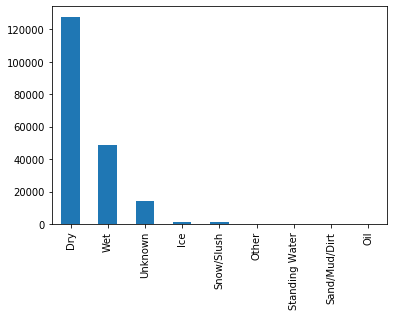

In [22]:
fig, ax = plt.subplots()
df['ROADCOND'].value_counts().plot(ax=ax, kind='bar')

In [23]:
df['LIGHTCOND'].unique()

array(['Dark - Street Lights On', 'Daylight', 'Dawn', 'Unknown',
       'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dusk',
       'Dark - Unknown Lighting', 'Other'], dtype=object)

In [24]:
df['LIGHTCOND'].value_counts()

Daylight                    118712
Dark - Street Lights On      49843
Unknown                      12658
Dusk                          6023
Dawn                          2596
Dark - No Street Lights       1568
Dark - Street Lights Off      1224
Other                          235
Dark - Unknown Lighting         23
Name: LIGHTCOND, dtype: int64

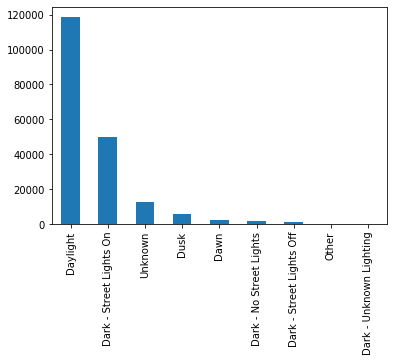

In [25]:
fig, ax = plt.subplots()
df['LIGHTCOND'].value_counts().plot(ax=ax, kind='bar')

In [26]:
df.drop(df[(df['SEVERITYCODE'] == '0') | (df['WEATHER'] == 'Unknown') 
           | (df['ROADCOND'] == 'Unknown') | (df['LIGHTCOND'] == 'Unknown')].index, inplace = True)

In [27]:
df.shape

(175032, 5)

In [28]:
df.groupby(['SEVERITYCODE'])['ADDRTYPE'].value_counts()

SEVERITYCODE  ADDRTYPE    
1             Block           79870
              Intersection    34928
              Alley             524
2             Block           29107
              Intersection    27197
              Alley              79
2b            Intersection     1515
              Block            1471
              Alley               5
3             Block             185
              Intersection      151
Name: ADDRTYPE, dtype: int64

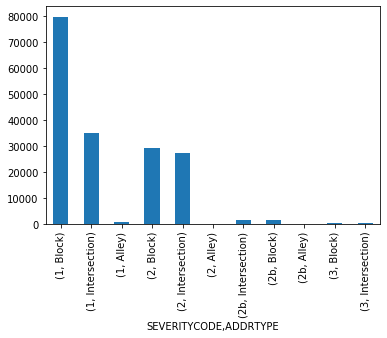

In [29]:
data = df.groupby(['SEVERITYCODE'])['ADDRTYPE'].value_counts()
data.plot.bar()

In [30]:
df.groupby(['SEVERITYCODE'])['WEATHER'].value_counts()

SEVERITYCODE  WEATHER                 
1             Clear                       73793
              Raining                     21718
              Overcast                    18465
              Snowing                       665
              Fog/Smog/Smoke                368
              Other                         177
              Sleet/Hail/Freezing Rain       83
              Blowing Sand/Dirt              30
              Severe Crosswind               18
              Partly Cloudy                   5
2             Clear                       35997
              Raining                     11189
              Overcast                     8719
              Fog/Smog/Smoke                183
              Snowing                       164
              Other                          79
              Sleet/Hail/Freezing Rain       28
              Blowing Sand/Dirt              13
              Severe Crosswind                7
              Partly Cloudy                   4
2

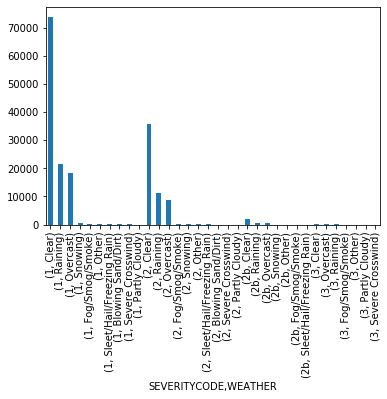

In [31]:
data = df.groupby(['SEVERITYCODE'])['WEATHER'].value_counts()
data.plot.bar()


In [32]:
df.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts()

SEVERITYCODE  ROADCOND      
1             Dry               82571
              Wet               31016
              Ice                 825
              Snow/Slush          687
              Standing Water       76
              Other                64
              Sand/Mud/Dirt        46
              Oil                  37
2             Dry               40150
              Wet               15694
              Ice                 267
              Snow/Slush          156
              Other                42
              Standing Water       29
              Oil                  24
              Sand/Mud/Dirt        21
2b            Dry                2214
              Wet                 746
              Ice                  18
              Snow/Slush            7
              Other                 3
              Standing Water        3
3             Dry                 266
              Wet                  69
              Ice                   1
Name: ROADCOND, dtype

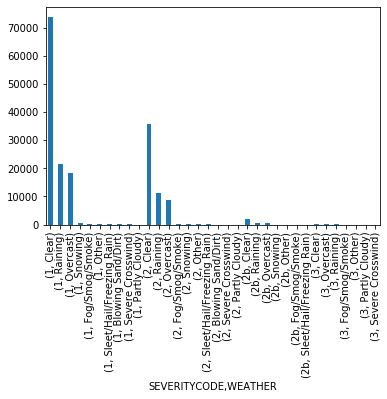

In [33]:
data = df.groupby(['SEVERITYCODE'])['WEATHER'].value_counts()
data.plot.bar()

In [34]:
df.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts()

SEVERITYCODE  ROADCOND      
1             Dry               82571
              Wet               31016
              Ice                 825
              Snow/Slush          687
              Standing Water       76
              Other                64
              Sand/Mud/Dirt        46
              Oil                  37
2             Dry               40150
              Wet               15694
              Ice                 267
              Snow/Slush          156
              Other                42
              Standing Water       29
              Oil                  24
              Sand/Mud/Dirt        21
2b            Dry                2214
              Wet                 746
              Ice                  18
              Snow/Slush            7
              Other                 3
              Standing Water        3
3             Dry                 266
              Wet                  69
              Ice                   1
Name: ROADCOND, dtype

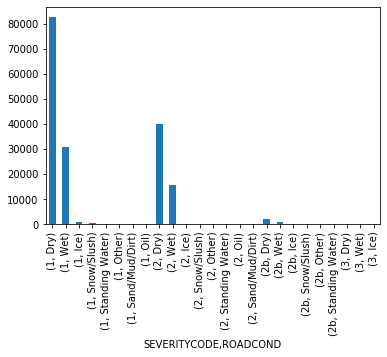

In [35]:
data = df.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts()
data.plot.bar()

In [36]:
df.groupby(['SEVERITYCODE'])['LIGHTCOND'].value_counts()

SEVERITYCODE  LIGHTCOND               
1             Daylight                    75152
              Dark - Street Lights On     32712
              Dusk                         3760
              Dawn                         1633
              Dark - No Street Lights      1095
              Dark - Street Lights Off      810
              Other                         147
              Dark - Unknown Lighting        13
2             Daylight                    38533
              Dark - Street Lights On     14412
              Dusk                         1919
              Dawn                          821
              Dark - No Street Lights       329
              Dark - Street Lights Off      310
              Other                          51
              Dark - Unknown Lighting         8
2b            Daylight                     1763
              Dark - Street Lights On      1004
              Dusk                          107
              Dawn                           60
 

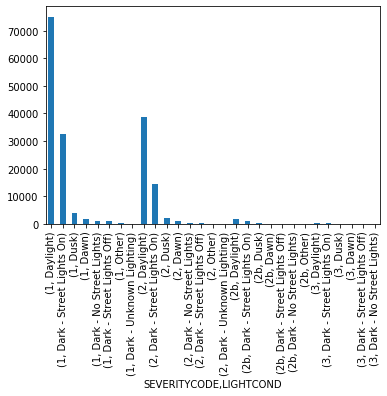

In [37]:
data = df.groupby(['SEVERITYCODE'])['LIGHTCOND'].value_counts()
data.plot.bar()

# Methodology
In the first step we properly loaded the data and kept only the variables we need for the analysis, which are the variable we are trying to predict (SEVERITYCODE) and the predictor variables (ADDRTYPE, WEATHER, ROADCOND, LIGHTCOND). We then explored the different types of values within each variable and plotted them on a bar graph. After removing unknown entries in the data, we then plotted each predictor variable value and grouped them by severitycode. This gives a visual idea of what factors seemed to be more common in the different types of accidents.

In the second step we will prepare our data for model building. Since all the variables are categorical, we will label encode them to produce numerical labels. We will then randomly split our data into training and test sets for our model.

In the third and final step we will fit our data into different models and evaluate them to see which produces the highest accuracy. Since we want to use machine learning models that can be used to predict a certain class or group based on given conditions, the models we fit will be SVM (Support Vector Machines), K-Nearest Neighbors, Logistic Regression, and Decision Trees. After fitting each model, we will calculate its accuracy using various methods such as f1-score, jaccard similarity score, and classification report.

In [38]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics
from sklearn.metrics import log_loss

In [39]:
le = preprocessing.LabelEncoder()
df['SEVERITYCODE'] = le.fit_transform(df['SEVERITYCODE'])
df['ADDRTYPE'] = le.fit_transform(df['ADDRTYPE'])
df['WEATHER'] = le.fit_transform(df['WEATHER'])
df['ROADCOND'] = le.fit_transform(df['ROADCOND'])
df['LIGHTCOND'] = le.fit_transform(df['LIGHTCOND'])
df['SEVERITYCODE'] = le.fit_transform(df['SEVERITYCODE'])

In [40]:
X = df[['ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-0.74052664,  1.68407418,  1.62432509, -1.47291762],
       [-0.74052664, -0.70862671, -0.62235634,  0.60583041],
       [-0.74052664, -0.70862671, -0.62235634,  0.60583041],
       ...,
       [-0.74052664,  0.72699382, -0.62235634,  0.60583041],
       [-0.74052664,  1.68407418,  1.62432509, -1.47291762],
       [-0.74052664, -0.70862671, -0.62235634,  0.60583041]])

In [41]:
y = np.asarray(df['SEVERITYCODE'])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (122522, 4) (122522,)
Test set: (52510, 4) (52510,)


# Modeling
SVM

In [43]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
yhat_clf = clf.predict(X_test)
yhat_clf


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

K-Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
k = 7
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [47]:
yhat_kn = neigh.predict(X_test)
yhat_kn

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
LR = LogisticRegression(C=0.01, multi_class = 'multinomial', max_iter=1000)
LR.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
yhat_LR = LR.predict(X_test)
yhat_LR

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
predTree = Tree.predict(X_test)
predTree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Evaluation
SVM

In [54]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_clf))

Train set Accuracy:  0.6593591355021955
Test set Accuracy:  0.6577032946105503


In [55]:
f1_score(y_test, yhat_clf, average='weighted')

0.5218951125306153

In [56]:
jaccard_similarity_score(y_test, yhat_clf)

C:\Users\prati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6577032946105503

In [57]:
print (classification_report(y_test, yhat_clf))

C:\Users\prati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.66      1.00      0.79     34536
           1       0.00      0.00      0.00     16960
           2       0.00      0.00      0.00       910
           3       0.00      0.00      0.00       104

    accuracy                           0.66     52510
   macro avg       0.16      0.25      0.20     52510
weighted avg       0.43      0.66      0.52     52510



K-Nearest Neighbors

In [58]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_kn))

Train set Accuracy:  0.4990205840583732
Test set Accuracy:  0.49186821557798516


In [59]:
f1_score(y_test, yhat_kn, average='weighted')

0.4987122026055762

In [60]:
jaccard_similarity_score(y_test, yhat_kn)

C:\Users\prati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.49186821557798516

In [61]:
print (classification_report(y_test, yhat_kn))

              precision    recall  f1-score   support

           0       0.69      0.44      0.54     34536
           1       0.35      0.62      0.45     16960
           2       0.00      0.00      0.00       910
           3       0.00      0.00      0.00       104

    accuracy                           0.49     52510
   macro avg       0.26      0.27      0.25     52510
weighted avg       0.57      0.49      0.50     52510



C:\Users\prati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression

In [62]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_LR))

Train set Accuracy:  0.6593591355021955
Test set Accuracy:  0.6577032946105503


In [63]:
f1_score(y_test, yhat_LR, average='weighted')

0.5218951125306153

In [64]:
jaccard_similarity_score(y_test, yhat_LR)

C:\Users\prati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6577032946105503

In [65]:
print(classification_report(y_test, yhat_LR))

C:\Users\prati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.66      1.00      0.79     34536
           1       0.00      0.00      0.00     16960
           2       0.00      0.00      0.00       910
           3       0.00      0.00      0.00       104

    accuracy                           0.66     52510
   macro avg       0.16      0.25      0.20     52510
weighted avg       0.43      0.66      0.52     52510



In [66]:
yhat_prob = LR.predict_proba(X_test)
log_loss(y_test, yhat_prob)

0.7070526108799241

Decision Tree

In [67]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, Tree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predTree))

Train set Accuracy:  0.6593591355021955
Test set Accuracy:  0.6577032946105503


In [68]:
f1_score(y_test, predTree, average='weighted')

0.5218951125306153

In [69]:
jaccard_similarity_score(y_test, predTree)

C:\Users\prati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6577032946105503

In [70]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79     34536
           1       0.00      0.00      0.00     16960
           2       0.00      0.00      0.00       910
           3       0.00      0.00      0.00       104

    accuracy                           0.66     52510
   macro avg       0.16      0.25      0.20     52510
weighted avg       0.43      0.66      0.52     52510



C:\Users\prati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Results and Discussion
Through our exploratory analysis we see that the majority of accidents from this dataset resulted in prop damage. In all accident groups, it appears that the accident occurred the most during daylight, when the weather was clear, and road condition was dry. The second most likely conditions that cause accidents are rainy weather, wet road conditions, and being in the dark with street lights on. Most of the accidents that resulted in prop damage occurred at a block, while accidents that resulted in injury occurred almost equally at blocks and intersections. It seems that accidents that resulted in fatality only occurred at blocks and intersections.

The four models we built are all very similar in terms of prediction and accuracy. However, overall it seems that the model accuracy for all models can be greatly improved. The highest prediction accuracy is only around 65.73%. The classification reports for all the models (except K-Nearest Neighbors) also show that the model could only predict accidents with prop damage. This could likely be due to eliminating many variables that could be more significant predictors or having significantly more data for prop damage accidents than other accidents. We only kept the "environmental" variables so our model had very limited data and predictors. It is pretty difficult to choose the most accurate model since the test set accuracy is the same for the SVM, Logistic Regression, and Decision Tree models. However, the Decision Tree train set accuracy is slightly higher so we can say that this model is more accurate.

In terms of recommendations, based on our observations and analysis, we should pay more attention on the road when faced with conditions that do not seem to bring much risk. Road signs and warnings should be put up to caution drivers and pedestrians, especially at blocks and intersections. More caution and speed limits should be enforced during rainy and wet conditions since they are the second lead cause of car accidents (in this model). Installing signs and lights that light up in the dark will be very helpful in cautioning drivers at night. If we want to predict the severity of car accidents solely based on these environmental and road factors, the decision tree would be a good model to use.

# Conclusion
In this project, we focused on finding the major environmental factors and road conditions that affect car accidents, as well as building a model that can help predict the severity of car accidents based on these conditions. We cleaned our data and prepared it for exploratory data analysis and model building. We fit four machine learning models on our data and determined which produces the most accurate predictions. Based on our analysis and results, we made some recommendations to improve the safety of drivers and those on the road during certain road and weather conditions. Finally, we suggested a model that produces the best results for further analysis of car accident severity based on the same predictors.